In [1]:
!pip install opencv-python

In [2]:
import os
import cv2
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Introduction to Histogram Equalization

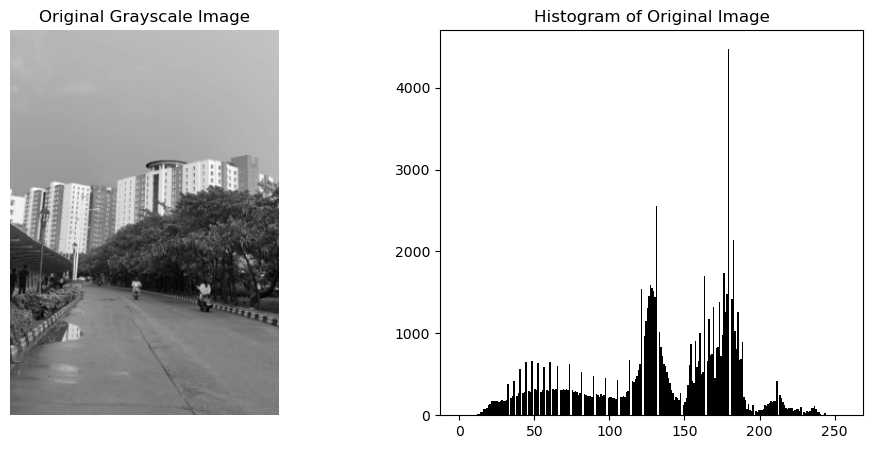

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the grayscale image
image = cv2.imread("VIT_gray.png", cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Plot the histogram of the original image
plt.subplot(1, 2, 2)
plt.hist(image.ravel(), bins=256, range=[0, 256], color='black')
plt.title('Histogram of Original Image')

plt.show()

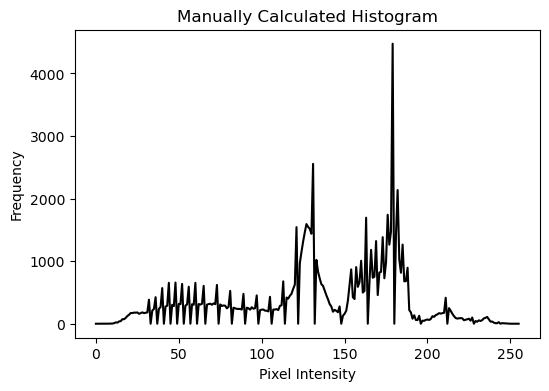

In [4]:
# Manually calculate the histogram
histogram = np.zeros(256, dtype=int)
for pixel in image.ravel():
    histogram[pixel] += 1

# Plot the manually calculated histogram
plt.figure(figsize=(6, 4))
plt.plot(histogram, color='black')
plt.title('Manually Calculated Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

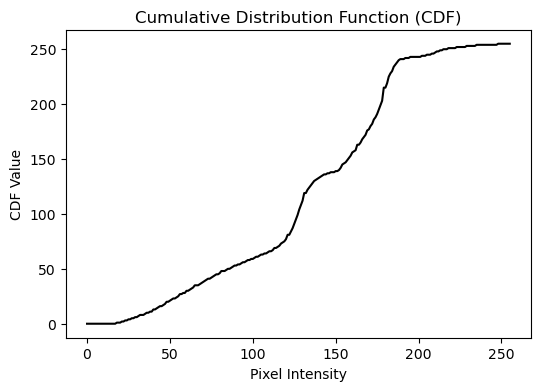

In [5]:
# Compute the CDF from the histogram
cdf = histogram.cumsum()

# Normalize the CDF to the range [0, 255]
cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
cdf_normalized = cdf_normalized.astype('uint8')

# Plot the CDF
plt.figure(figsize=(6, 4))
plt.plot(cdf_normalized, color='black')
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('Pixel Intensity')
plt.ylabel('CDF Value')
plt.show()

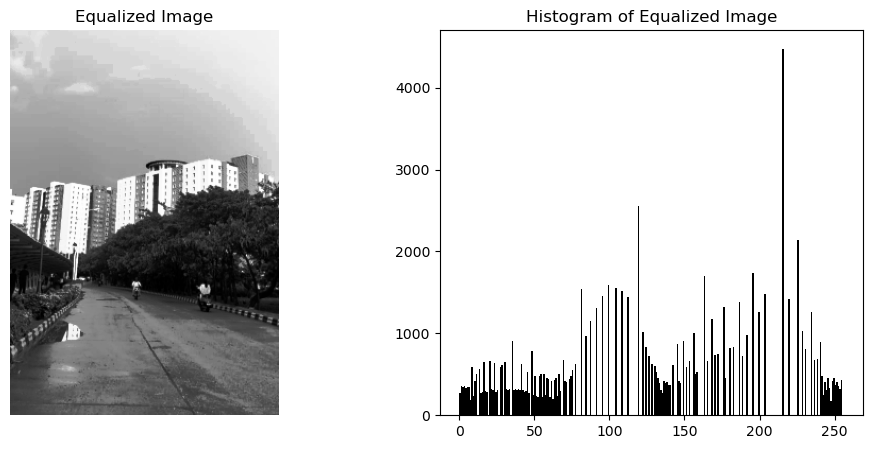

In [6]:
# Map the original pixel values to equalized pixel values using the CDF
equalized_image = cdf_normalized[image]

# Display the equalized image
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

# Plot the histogram of the equalized image
plt.subplot(1, 2, 2)
plt.hist(equalized_image.ravel(), bins=256, range=[0, 256], color='black')
plt.title('Histogram of Equalized Image')

plt.show()

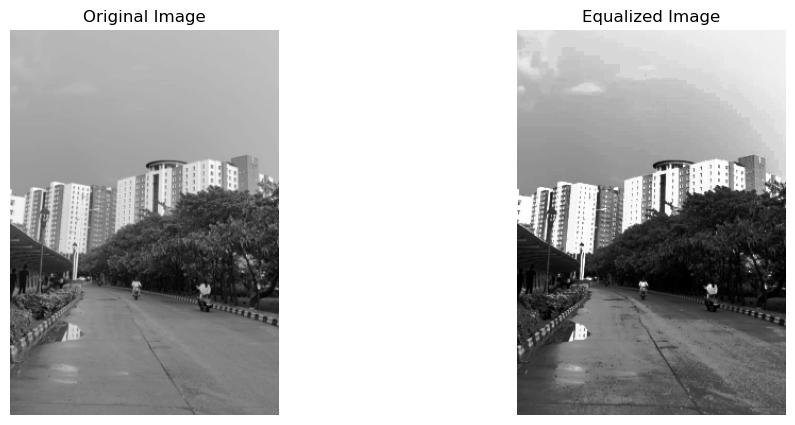

In [7]:
# Compare the original and equalized images
plt.figure(figsize=(12, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Equalized Image
plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.show()

# Comparing Histogram Equalization Techniques

In [8]:
image = cv2.imread("VIT_gray.png", cv2.IMREAD_GRAYSCALE)

# Apply standard Histogram Equalization
equalized_image = cv2.equalizeHist(image)

# Implement Adaptive Histogram Equalization (AHE)
def apply_ahe(image, tile_size):
    # Get the dimensions of the image
    h, w = image.shape

    # Create an empty array for the output image
    ahe_image = np.zeros_like(image)

    # Define the number of tiles in each dimension
    tiles_x = w // tile_size
    tiles_y = h // tile_size

    # Apply histogram equalization to each tile
    for i in range(tiles_y):
        for j in range(tiles_x):
            # Extract the tile
            x_start = j * tile_size
            y_start = i * tile_size
            tile = image[y_start:y_start + tile_size, x_start:x_start + tile_size]

            # Apply histogram equalization to the tile
            equalized_tile = cv2.equalizeHist(tile)

            # Place the equalized tile back into the output image
            ahe_image[y_start:y_start + tile_size, x_start:x_start + tile_size] = equalized_tile

    return ahe_image

# Apply AHE with a tile size of 8x8
ahe_image = apply_ahe(image, tile_size=8)

In [9]:
# Apply CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(image)

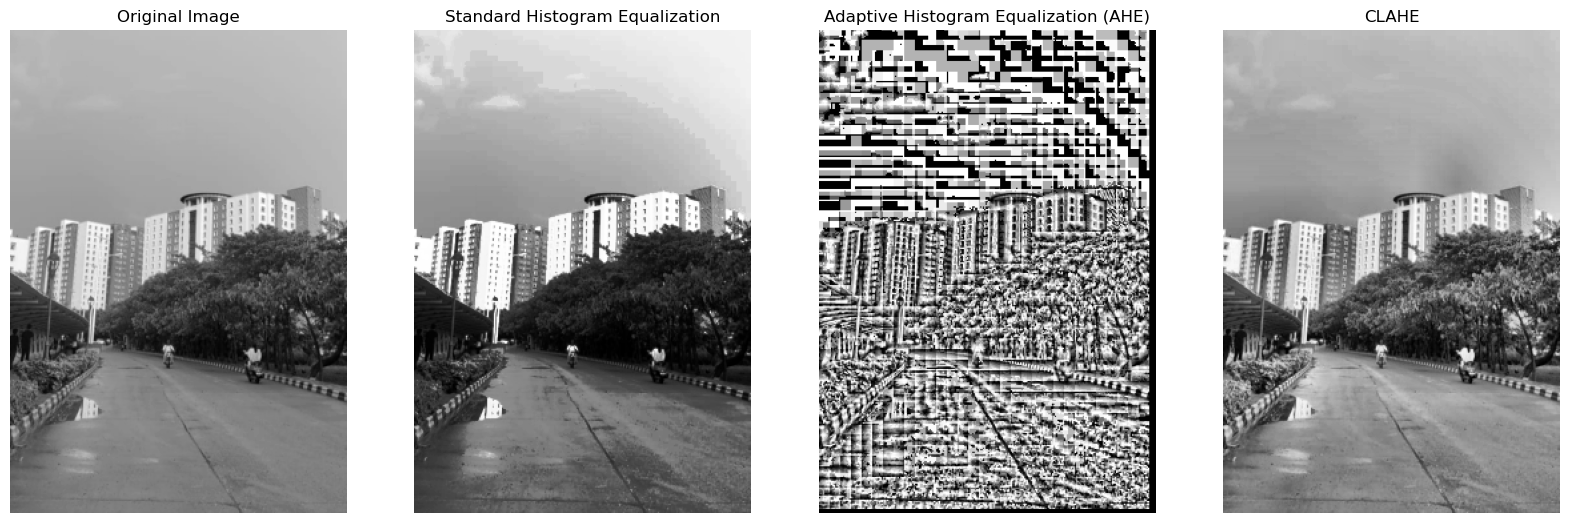

In [10]:
# Display the original image and the results of different histogram equalization techniques
titles = ['Original Image', 'Standard Histogram Equalization', 'Adaptive Histogram Equalization (AHE)', 'CLAHE']
images = [image, equalized_image, ahe_image, clahe_image]

plt.figure(figsize=(20, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.show()

Discussion:


Standard Histogram Equalization: This method enhances the global contrast of the image but might lead to over-enhancement or loss of details in some areas, especially if the image has varying lighting conditions.

Adaptive Histogram Equalization (AHE): AHE enhances contrast on a local scale by dividing the image into smaller regions and applying histogram equalization to each region. However, this method can sometimes lead to over-amplification of noise, particularly in homogeneous regions.

Contrast Limited Adaptive Histogram Equalization (CLAHE): CLAHE limits the contrast in each local region, preventing over-amplification of noise and providing a balanced enhancement. It's particularly useful for medical imaging and other applications where preserving fine details is critical.

# Implementing Histogram Equalization on Color Images

In [11]:
# Load the color image
image = cv2.imread("doremon.jpeg")

# Convert the image from BGR (OpenCV default) to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Split the image into its R, G, and B channels
R, G, B = cv2.split(image_rgb)

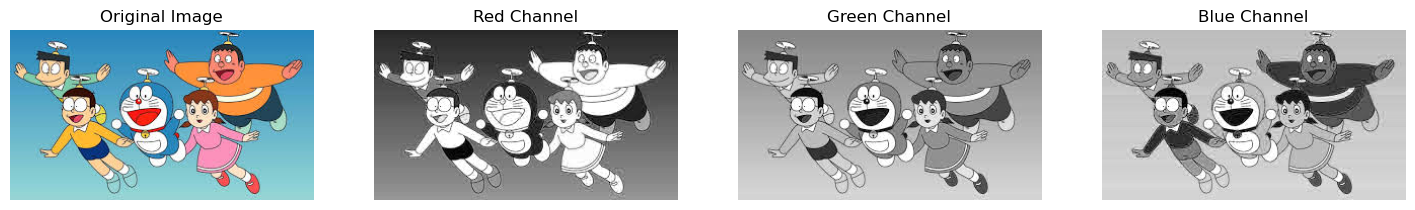

In [12]:
# Display the original image and the separated channels
plt.figure(figsize=(18, 6))

plt.subplot(1, 4, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(R, cmap='gray')
plt.title('Red Channel')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(G, cmap='gray')
plt.title('Green Channel')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(B, cmap='gray')
plt.title('Blue Channel')
plt.axis('off')

plt.show()

In [13]:
# Apply histogram equalization to each channel
R_equalized = cv2.equalizeHist(R)
G_equalized = cv2.equalizeHist(G)
B_equalized = cv2.equalizeHist(B)

In [14]:
# Merge the equalized channels back together
equalized_image = cv2.merge([R_equalized, G_equalized, B_equalized])

# Convert the equalized image from RGB to BGR for displaying with OpenCV (if needed)
equalized_image_bgr = cv2.cvtColor(equalized_image, cv2.COLOR_RGB2BGR)

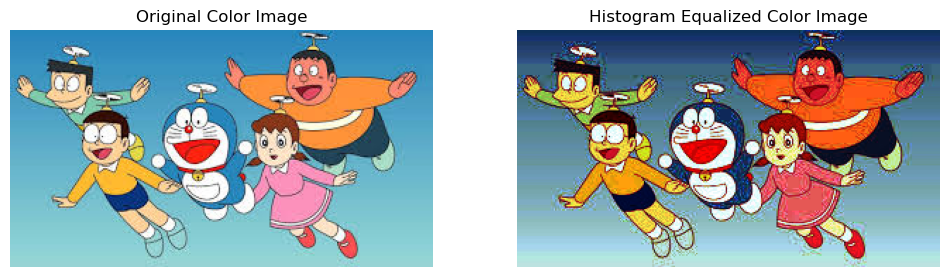

In [15]:
# Display the original and equalized images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Color Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image)
plt.title('Histogram Equalized Color Image')
plt.axis('off')

plt.show()

Discussion:


Visual Differences: 
Histogram equalization on color images can significantly enhance the contrast of each channel, leading to a more vibrant and detailed image. However, since the channels are processed independently, it might also cause color distortions or shifts if the intensity distributions of the channels differ significantly.

Effects on Color Images:
Increased Contrast: The equalized image often appears sharper and more vivid, especially in images with low contrast or poor lighting.
Potential Color Shifts: Independent processing of the RGB channels may lead to unnatural color shifts, particularly in regions where one channel dominates the intensity.

# Histogram Equalization in Different Applications

In [16]:
# Load a grayscale medical image (e.g., X-ray)
medical_image = cv2.imread("X_Ray.jpeg", cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_medical_image = cv2.equalizeHist(medical_image)

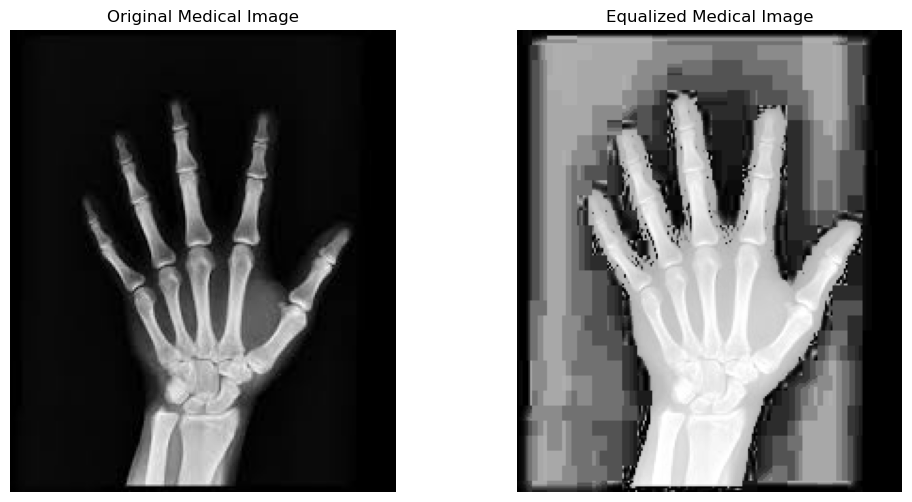

In [17]:
# Display the original and equalized images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(medical_image, cmap='gray')
plt.title('Original Medical Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_medical_image, cmap='gray')
plt.title('Equalized Medical Image')
plt.axis('off')

plt.show()

Discussion:

Enhanced Visibility: Histogram equalization can make important features like bones, tissues, or anomalies more distinguishable.

Clinical Applications: This technique is valuable in diagnostics, where subtle differences in tissue density or bone structure need to be visualized clearly.

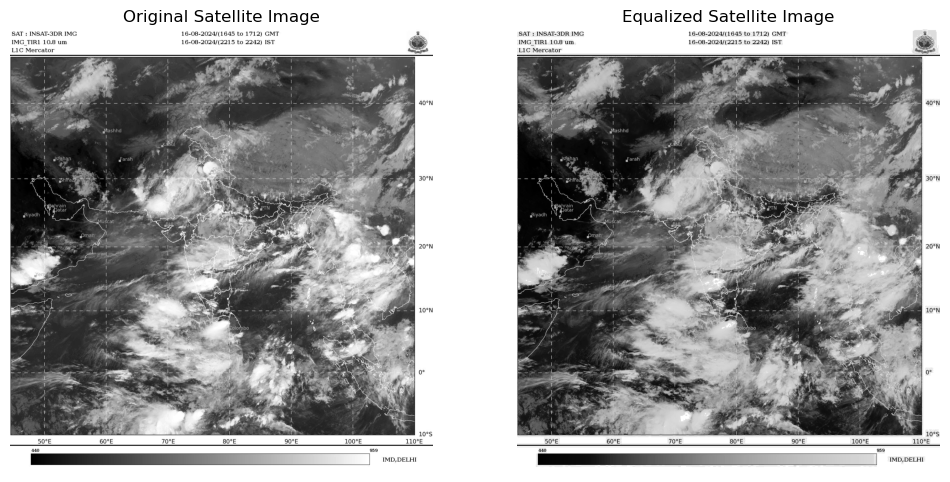

In [18]:
# Load a grayscale satellite image
satellite_image = cv2.imread("Satellite_gray.jpg", cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_satellite_image = cv2.equalizeHist(satellite_image)

# Display the original and equalized images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(satellite_image, cmap='gray')
plt.title('Original Satellite Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_satellite_image, cmap='gray')
plt.title('Equalized Satellite Image')
plt.axis('off')

plt.show()

Discussion:
    
Improved Detail Recognition: Histogram equalization enhances the visibility of features, aiding in land use analysis, disaster response, and urban planning.

Contrast Improvement: By spreading out the most frequent intensity values, the technique highlights different land covers and geographical features.

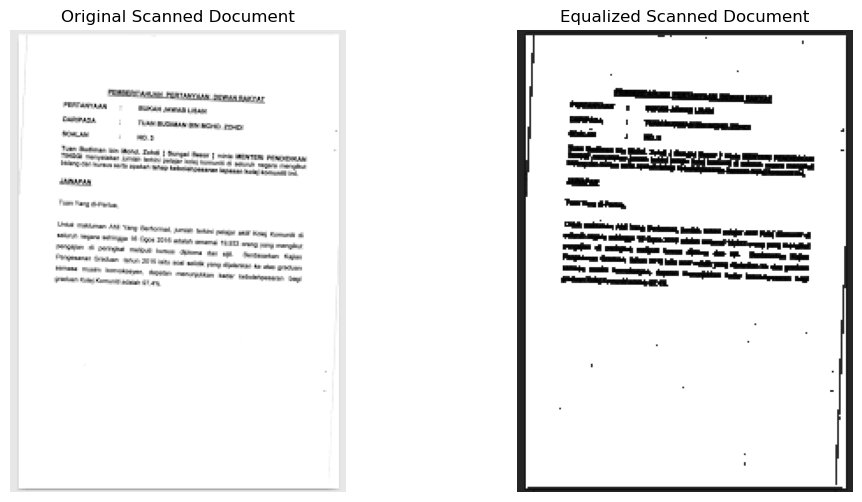

In [19]:
# Load a grayscale scanned document image
document_image = cv2.imread("scanned.png", cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_document_image = cv2.equalizeHist(document_image)

# Display the original and equalized images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(document_image, cmap='gray')
plt.title('Original Scanned Document')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_document_image, cmap='gray')
plt.title('Equalized Scanned Document')
plt.axis('off')

plt.show()

Discussion:
    
Enhanced Text Clarity: Equalization makes faded or low-contrast text more readable, which is particularly useful in archival and digitization projects.

Document Restoration: This technique is beneficial in restoring old, faded documents to a more legible state.

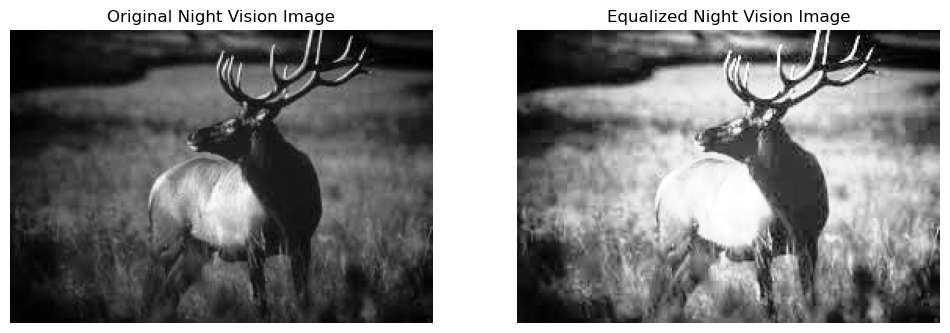

In [20]:
# Load a grayscale night vision image
night_vision_image = cv2.imread("night_vision.jpeg", cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_night_vision_image = cv2.equalizeHist(night_vision_image)

# Display the original and equalized images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(night_vision_image, cmap='gray')
plt.title('Original Night Vision Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_night_vision_image, cmap='gray')
plt.title('Equalized Night Vision Image')
plt.axis('off')

plt.show()


Discussion:

Improved Object Detection: In night vision, histogram equalization can enhance the contrast, making objects and movement easier to detect.

Application in Security: This technique is crucial in surveillance and military operations where night vision is used.

# Histogram Equalization for Low Contrast Images

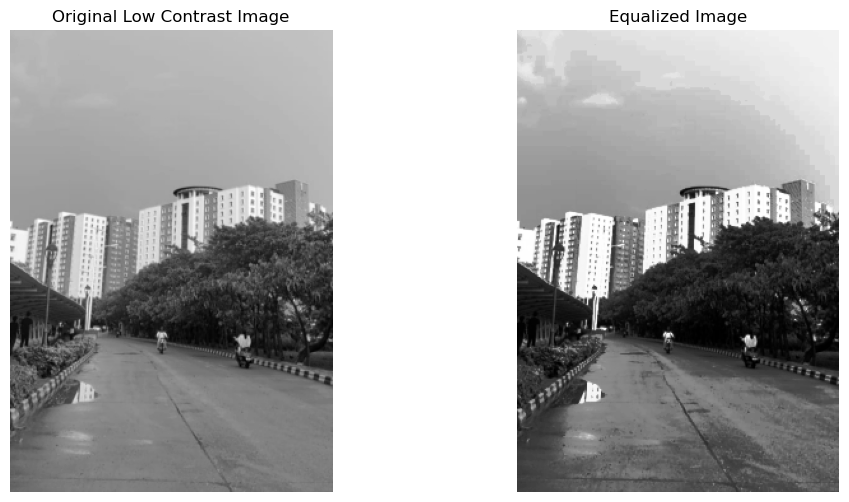

In [21]:
# Load a low contrast grayscale image
low_contrast_image = cv2.imread("Vit_gray.png", cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_image = cv2.equalizeHist(low_contrast_image)

# Display the original and equalized images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(low_contrast_image, cmap='gray')
plt.title('Original Low Contrast Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.show()

1. Improvement in Contrast:

Original Image: The original image likely has a narrow range of intensity values, making it appear dull or washed out.

Equalized Image: After applying histogram equalization, the intensity values are spread more evenly across the full range (0-255), enhancing the contrast.


2. Feature Visibility:

Original Image: In the low contrast image, it might be difficult to distinguish between different features, such as edges, textures, or objects.

Equalized Image: The histogram equalization process enhances these features by increasing the contrast between different regions of the image, making edges sharper and textures more apparent.

Discussion:

Addressing Low Contrast Issues:

Histogram Compression: In low contrast images, the pixel intensity values are often clustered in a small region of the histogram. Histogram equalization spreads these values across the entire range, which improves the overall contrast of the image.

Visual Enhancement: This technique is particularly useful in making details in low-contrast images more visible, which is crucial in fields like medical imaging, satellite imagery, and photography.
Limitations: While histogram equalization enhances contrast, it may sometimes increase noise or exaggerate less important details. In such cases, more sophisticated techniques like adaptive histogram equalization (CLAHE) might be more suitable.

# Multi-Scale Histogram Equalization

In [22]:
# Load the original image
original_image = cv2.imread("doremon.jpeg", cv2.IMREAD_GRAYSCALE)

# Resize the image to different scales
image_50 = cv2.resize(original_image, (0, 0), fx=0.5, fy=0.5)  # 50% scale
image_100 = original_image  # 100% scale (original size)
image_200 = cv2.resize(original_image, (0, 0), fx=2.0, fy=2.0)  # 200% scale

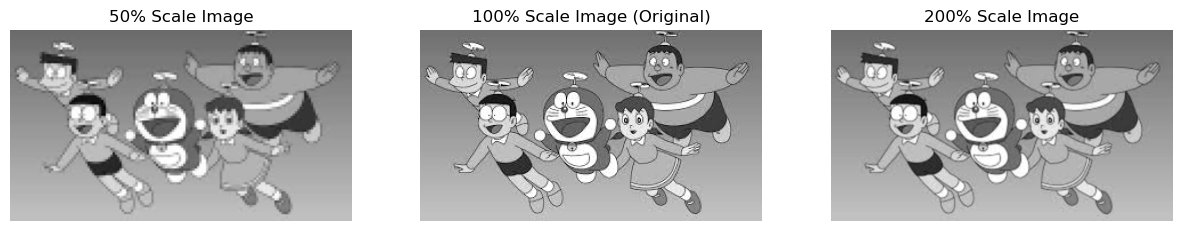

In [23]:
# Display the resized images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_50, cmap='gray')
plt.title('50% Scale Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image_100, cmap='gray')
plt.title('100% Scale Image (Original)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(image_200, cmap='gray')
plt.title('200% Scale Image')
plt.axis('off')

plt.show()

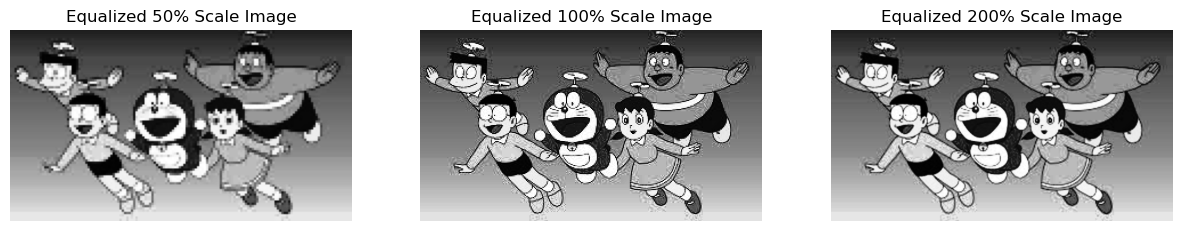

In [24]:
# Apply histogram equalization to each resized image
equalized_50 = cv2.equalizeHist(image_50)
equalized_100 = cv2.equalizeHist(image_100)
equalized_200 = cv2.equalizeHist(image_200)

# Display the equalized images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(equalized_50, cmap='gray')
plt.title('Equalized 50% Scale Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(equalized_100, cmap='gray')
plt.title('Equalized 100% Scale Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(equalized_200, cmap='gray')
plt.title('Equalized 200% Scale Image')
plt.axis('off')

plt.show()

1. Effect of Scaling on Histogram Equalization:

50% Scale: The smaller image may lose some fine details, and histogram equalization could result in a more pronounced contrast, but possibly with some loss in detail.

100% Scale: The original image retains its details, and equalization enhances the contrast without significantly altering the image's structure.

200% Scale: Enlarging the image may introduce interpolation artifacts. Histogram equalization on this scale could enhance these artifacts, making the image appear less natural, but with amplified contrast.

2. Analysis of Image Details:

50% Scale: Reduced details may lead to an overly smoothed appearance after equalization.

100% Scale: This scale usually gives the best balance between contrast enhancement and detail preservation.

200% Scale: The enlargement might exaggerate noise and artifacts, leading to less desirable results.

Discussion:

Impact of Scale: The scale of the image significantly affects the results of histogram equalization. Smaller images tend to lose details, and this loss can be exaggerated by equalization, whereas larger images might introduce artifacts that are also enhanced by the process.

Best Practices: It's essential to choose an appropriate scale for the task at hand. For most purposes, applying histogram equalization at the image’s original scale (100%) provides a good balance between enhancing contrast and preserving details.

Practical Considerations: Multi-scale histogram equalization can be useful in scenarios where different levels of detail are required, such as in medical imaging or satellite imagery, where both macro and micro details might need to be emphasized.

# Histogram Equalization for Image Enhancement

In [25]:
# Load the images
image1 = cv2.imread("VIT_gray.png", cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread("scanned.png", cv2.IMREAD_GRAYSCALE)
image3 = cv2.imread("X_Ray.jpeg", cv2.IMREAD_GRAYSCALE)

In [26]:
# Apply histogram equalization
equalized_image1 = cv2.equalizeHist(image1)
equalized_image2 = cv2.equalizeHist(image2)
equalized_image3 = cv2.equalizeHist(image3)

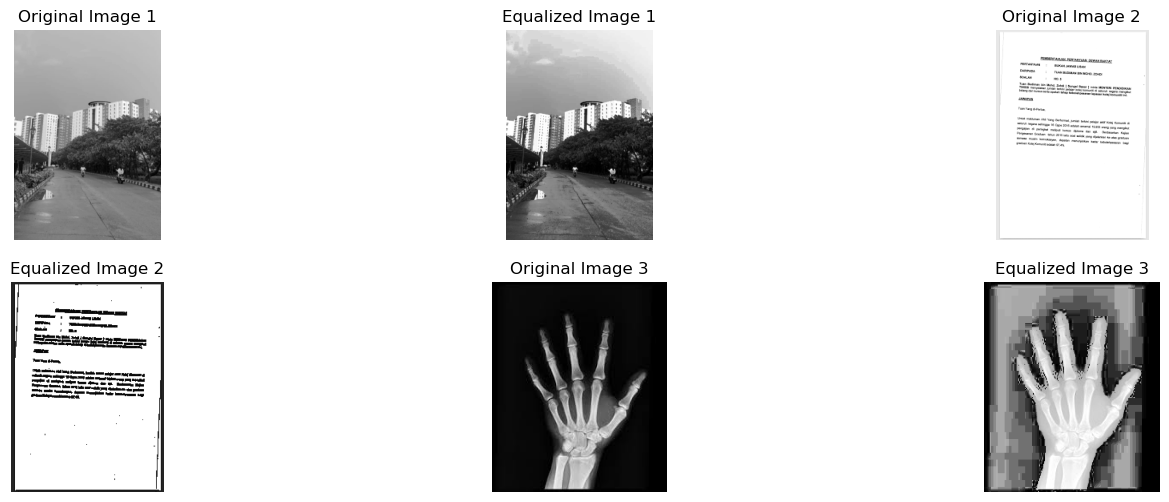

In [27]:
# Display the original and equalized images side by side
plt.figure(figsize=(18, 6))

# Image 1
plt.subplot(2, 3, 1)
plt.imshow(image1, cmap='gray')
plt.title('Original Image 1')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(equalized_image1, cmap='gray')
plt.title('Equalized Image 1')
plt.axis('off')

# Image 2
plt.subplot(2, 3, 3)
plt.imshow(image2, cmap='gray')
plt.title('Original Image 2')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(equalized_image2, cmap='gray')
plt.title('Equalized Image 2')
plt.axis('off')

# Image 3
plt.subplot(2, 3, 5)
plt.imshow(image3, cmap='gray')
plt.title('Original Image 3')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(equalized_image3, cmap='gray')
plt.title('Equalized Image 3')
plt.axis('off')

plt.show()

1. Detail Enhancement:

Low-contrast Images: Histogram equalization typically increases the visibility of subtle features in low-contrast images, making them easier to analyze.

High-contrast Images: The equalization process might help balance overexposed and underexposed regions, although it could also emphasize noise in these areas.

Fine-detail Images: For images with intricate details, equalization can bring out textures and edges that were previously less visible.

2. Clarity and Visual Quality:

Before Equalization: The original images may suffer from low contrast or poor visibility of certain regions, which can obscure important details.

After Equalization: The equalized images should show improved contrast, with a more even distribution of intensity values. This makes it easier to distinguish between different parts of the image, aiding in visual analysis.

Discussion:

Improvement in Visual Analysis: Histogram equalization is especially useful in scenarios where it’s critical to enhance contrast and bring out details. For example:

Medical Imaging: Enhancing X-rays or MRI scans to better reveal structures.

Satellite Imagery: Improving the contrast in satellite photos to make terrain features more distinguishable.

Document Analysis: Enhancing scanned documents to make text clearer and easier to read.

Night Vision: Making objects in low-light images more visible.

Limitations: While histogram equalization enhances overall contrast, it might not always be the best choice for images with high levels of noise, as it can amplify the noise along with the signal. In such cases, more advanced techniques like Adaptive Histogram Equalization (AHE) or Contrast Limited Adaptive Histogram Equalization (CLAHE) might be more appropriate.

# Histogram Equalization in Image Segmentation

In [28]:
# Load the grayscale image
image = cv2.imread("X_Ray.jpeg", cv2.IMREAD_GRAYSCALE)

# Apply Otsu's thresholding for segmentation
_, segmented_original = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

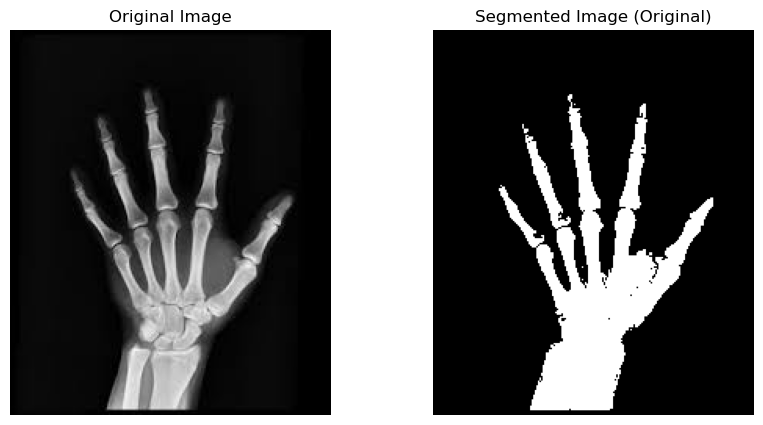

In [29]:
# Display the original and segmented images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_original, cmap='gray')
plt.title('Segmented Image (Original)')
plt.axis('off')

plt.show()

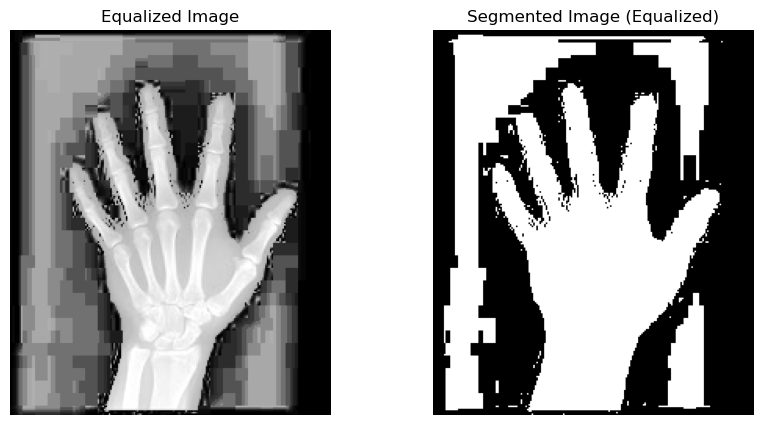

In [30]:
# Apply histogram equalization
equalized_image = cv2.equalizeHist(image)

# Apply Otsu's thresholding for segmentation on the equalized image
_, segmented_equalized = cv2.threshold(equalized_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the equalized image and the segmented result
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_equalized, cmap='gray')
plt.title('Segmented Image (Equalized)')
plt.axis('off')

plt.show()

1. Visual Analysis:

Original Image Segmentation: The segmentation on the original image might struggle with low contrast areas, leading to incorrect or incomplete region detection.

Equalized Image Segmentation: After histogram equalization, the segmentation should show improved delineation of regions, especially in areas that were previously low in contrast.

2. Impact on Segmentation Accuracy:

Before Equalization: The segmentation might miss or inaccurately segment regions where the intensity differences are subtle.

After Equalization: By enhancing contrast, histogram equalization makes it easier to distinguish between different regions based on their intensities, which can lead to more accurate segmentation.

Discussion:

Improved Region Detection: Histogram equalization helps in bringing out the differences in pixel intensities, making it easier for thresholding and region-based segmentation methods to accurately segment the image.

Effectiveness in Different Scenarios:

Medical Imaging: In medical images, where precise segmentation of structures (e.g., tumors, organs) is critical, histogram equalization can significantly improve the accuracy of automatic segmentation tools.

Satellite Imagery: For satellite images, where different land features need to be segmented, histogram equalization can enhance the contrast between different types of terrain, making segmentation more effective.

Document Analysis: In scanned documents, histogram equalization can help in segmenting text from the background, improving OCR performance or text extraction tasks.

Limitations: While histogram equalization improves segmentation in many cases, it might also amplify noise or create artifacts that can mislead the segmentation algorithm. In such cases, advanced techniques like CLAHE might be preferable, as they can control the contrast enhancement to prevent over-segmentation.